## 1. 데이터셋 준비

#### 샘플 이미지 확인

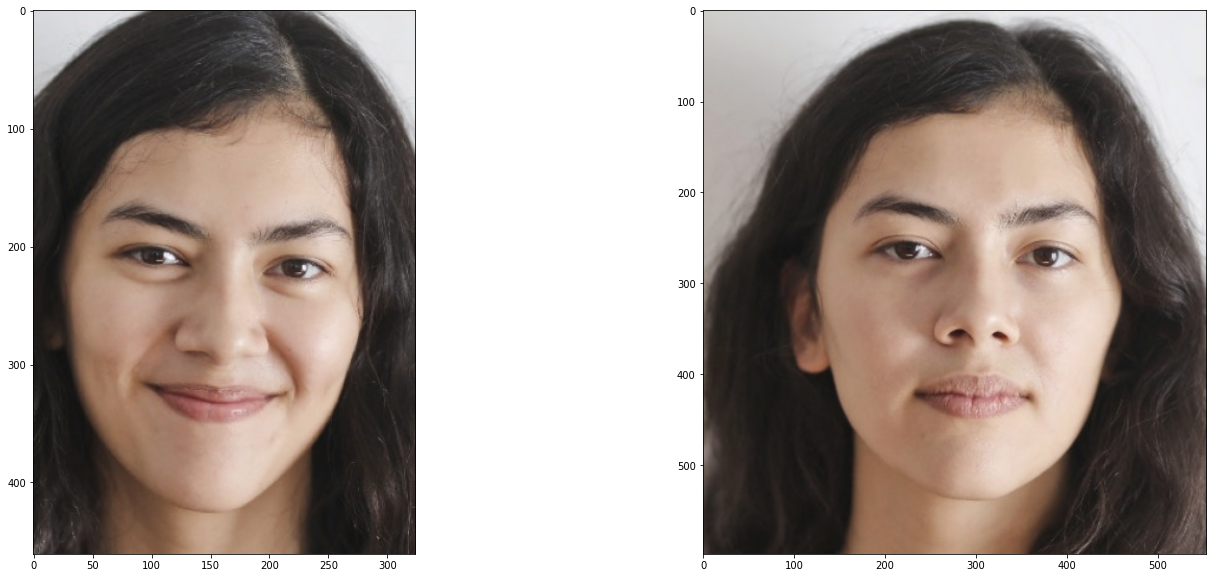

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/sample'
file_list = os.listdir(dir_path)

#Set figsize here
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

#### face detection 진행

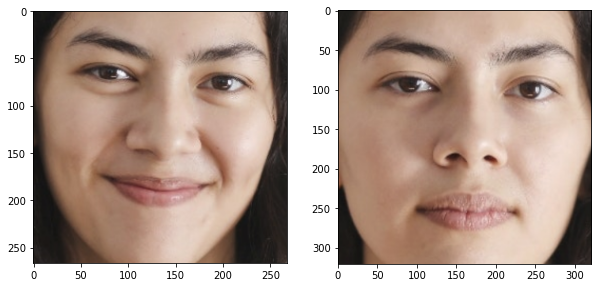

In [2]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/sample'
file_list = os.listdir(dir_path)

cropped_face = {}

plt.figure(figsize=(10,10))

for i, file in enumerate(file_list) :
    
    image_path = os.path.join(dir_path,file)
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    
    a, b, c, d = face_locations[0]
    cropped_face[file] = image[a:c,d:b,:]
    
    plt.subplot(1,2,i+1)
    plt.imshow(cropped_face[file])
    
plt.show()

#### face embedding

In [3]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    #print("얼굴 영역 좌표 : ",face_locations)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path) #파일 명
    embedding_dict = {}
    
    for file in file_list:
        
        image_file = os.path.join(dir_path,file)
        face = get_cropped_face(image_file)
        face_embedding = face_recognition.face_encodings(face)
        if len(face_embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로
            embedding_dict[file.split(".")[0]] = face_embedding[0]
               
    return embedding_dict

In [4]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/sample'
embedding_dict = get_face_embedding_dict(dir_path)

In [5]:
embedding_dict['sample1']

array([-1.94156587e-01,  5.08023016e-02,  2.82975137e-02, -7.32250363e-02,
       -1.58360109e-01, -1.05451345e-01, -5.03312834e-02, -1.68962747e-01,
        1.62470534e-01, -2.05901116e-01,  1.80552483e-01, -4.39228825e-02,
       -1.62120074e-01,  1.78493490e-03, -4.53166664e-02,  1.67055383e-01,
       -2.19931036e-01, -1.69494823e-01, -2.41607018e-02,  9.34852939e-03,
        7.32127354e-02,  2.20204685e-02,  4.65476736e-02,  8.30738172e-02,
       -1.27663419e-01, -3.62808853e-01, -9.97157246e-02, -7.56973401e-02,
       -9.34799574e-03, -9.21669975e-03, -4.52523790e-02, -2.28065095e-04,
       -2.07657456e-01, -4.67016175e-03,  2.69266758e-02,  1.04100130e-01,
        1.77010335e-02, -6.38337582e-02,  1.44722074e-01, -4.55804393e-02,
       -3.25498670e-01,  4.53561209e-02,  7.05058500e-02,  2.54553884e-01,
        2.49651834e-01, -2.80553219e-03, -3.98688279e-02, -2.25069106e-01,
        1.29154950e-01, -2.33853117e-01,  3.37159932e-02,  1.14036240e-01,
       -5.89913875e-02, -

In [6]:
embedding_dict['sample2']

array([-0.19344749,  0.08507643,  0.0363896 , -0.05440814, -0.13107713,
       -0.07806382, -0.05282614, -0.20003058,  0.16145305, -0.16833691,
        0.2007228 , -0.05897474, -0.18658864, -0.0304716 , -0.11372283,
        0.15091997, -0.25412259, -0.12388363,  0.01981588,  0.00535343,
        0.13891482,  0.01902437,  0.01627266,  0.09855888, -0.12682004,
       -0.33240619, -0.10199711, -0.11466835, -0.00580213, -0.03559579,
       -0.06651969, -0.02346109, -0.1853824 , -0.01903207, -0.02285021,
        0.07524901,  0.01714174, -0.10634396,  0.13324004, -0.02768154,
       -0.27803779,  0.04226726,  0.05426885,  0.24153095,  0.23189169,
       -0.00570536, -0.0441494 , -0.20928341,  0.15297349, -0.22993839,
       -0.0318322 ,  0.14068477, -0.05066659,  0.02509286,  0.01724585,
       -0.12405081,  0.05324318,  0.07863373, -0.21154502, -0.04492285,
        0.07590008, -0.0749908 ,  0.01320109, -0.07806234,  0.18988512,
        0.14081986, -0.08711182, -0.17056845,  0.12770641, -0.25

#### embedding된 벡터 사이 거리 확인

In [7]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [8]:
get_distance("sample1", "sample2")

0.3195785214828038

### distance : 0.32  대략적인 지표로 이용하자!

 ## 2. 얼굴 영역 자르기

In [9]:
import os
import numpy as np
from PIL import Image
import face_recognition
import matplotlib.pyplot as plt
from tqdm import tqdm #progress bar

In [10]:
def get_cropped_face(image_file):
    
    image = face_recognition.load_image_file(image_file) #image laod
    face_locations = face_recognition.face_locations(image) #face_locations
    
    if not len(face_locations)==0:
        #print("얼굴 영역 좌표 : ",face_locations)
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]
        
        return cropped_face
    
    return np.zeros(1)

In [11]:
def image_loader(dir_path):
    
    file_list = os.listdir(dir_path)
    cropped_dir = os.getenv('HOME')+'/aiffel/face_embedding/cropped'
    
    i = 0
    
    for file in tqdm(file_list) :
        
        image_path = os.path.join(dir_path,file)
        cropped_path = os.path.join(cropped_dir,file)
        face = get_cropped_face(image_path)
        
        if face.all() != 0 :
            pillow_image = Image.fromarray(face)
            pillow_image.save(cropped_path)
            i+=1
    
    print(i,"개의 이미지가 저장됐습니다.")
            

In [12]:
image_dir = os.getenv('HOME')+'/aiffel/face_embedding/data'
image_loader(image_dir)

100%|██████████| 2087/2087 [00:37<00:00, 55.23it/s]

600 개의 이미지가 저장됐습니다.


## 3 . Face 임베딩 추출하기

In [13]:
import face_recognition
import os
from tqdm import tqdm

def get_face_embedding(face):
    return face_recognition.face_encodings(face)

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path) #파일 명
    embedding_dict = {}
    
    for file in tqdm(file_list):
        image_path = os.path.join(dir_path,file)
        image_file = face_recognition.load_image_file(image_path)
    
        face_embedding = get_face_embedding(image_file)
        if len(face_embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로
            embedding_dict[file.split(".")[0]] = face_embedding[0]
               
    return embedding_dict

In [14]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/cropped'
embedding_dict = get_face_embedding_dict(dir_path)

100%|██████████| 600/600 [01:59<00:00,  5.02it/s]


## 4. 닮은 꼴 얼굴 찾기

In [40]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)


def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

def get_nearest_face(name, top=6): 
    sort_key_func = get_sort_key_func(name) #이름 받아서 임베딩 벡터 거리 계산
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))  #sort 진행 sort_key)func(x[0]) : 0이면 key, [1]이면 value
    
    top5 = {}
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        
        if sorted_faces[i][0].startswith('sample'): #이름에 sample이 있다면 자기 자신 사진이므로 제외해준다.
            continue
        
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({:.3f})'.format(i-1, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            top5[sorted_faces[i][0]] = sort_key_func(sorted_faces[i][0])
    
    return top5

In [46]:
top5_dict_1 = get_nearest_face('sample1')

순위 1 : 이름(최완정), 거리(0.487)
순위 2 : 이름(최승훈), 거리(0.491)
순위 3 : 이름(한지은), 거리(0.502)
순위 4 : 이름(민예지), 거리(0.509)
순위 5 : 이름(박은석), 거리(0.510)


In [47]:
top5_dict_2 =get_nearest_face('sample2')

순위 1 : 이름(박은석), 거리(0.482)
순위 2 : 이름(최승훈), 거리(0.485)
순위 3 : 이름(최완정), 거리(0.491)
순위 4 : 이름(송선미), 거리(0.541)
순위 5 : 이름(장혜진), 거리(0.543)


## 5. 닮은 이미지 출력

In [92]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img


def show_images_name(top5_dict,source_name) :

    dir_path = os.getenv('HOME')+'/aiffel/face_embedding/cropped'
    source_path = os.path.join(dir_path,source_name)
    
    source_img = Image.open(source_path)
    
    plt.figure(figsize=(15,15))    
    plt.subplot(1,6,1)
    plt.axis("off")
    plt.title(source_name.split(".")[0])
    plt.imshow(source_img)
    
    keys = list(top5_dict.keys())
    
    for i, name in enumerate(keys) :
    
        image_path = os.path.join(dir_path,name) + ".jpg"
        img = Image.open(image_path)        
        plt.subplot(1,6,i+2)
        plt.axis("off")
        plt.title(name)
        plt.imshow(img)       
    
    plt.show()

### matplot에선 한글 폰트를 지원하지 않는다.

 - 폰트를 다운 받고 matplot lib의 설정 파일을 수정해야지만 한글 폰트를 적용할 수 있다. cloud 환경이라 적용에 실패했다.

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_te

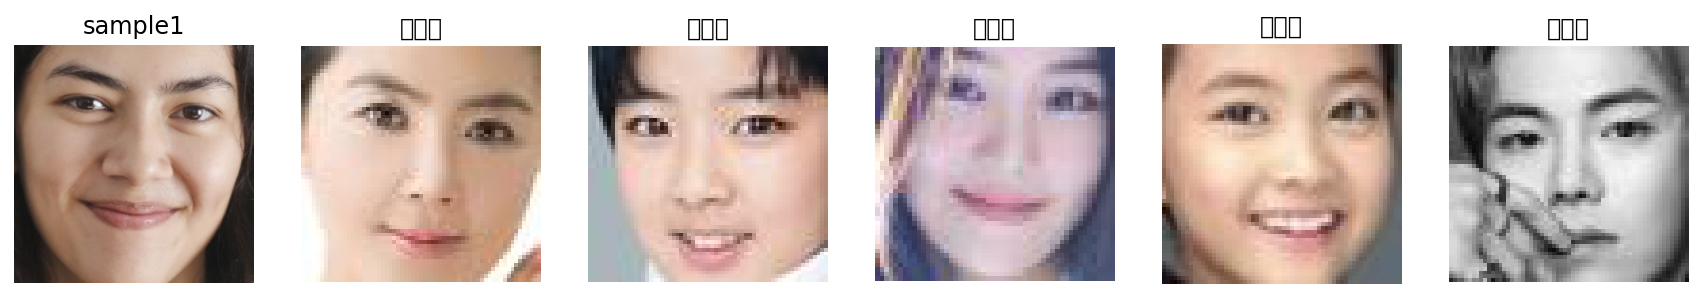

In [99]:
show_images_name(top5_dict_1,"sample1.png")

### 이미지의 이름 대신 distance를 나타내도록 변경

In [106]:
import matplotlib.pyplot as plt
import matplotlib.image as img


def show_images_num(top5_dict,source_name) :

    dir_path = os.getenv('HOME')+'/aiffel/face_embedding/cropped'
    source_path = os.path.join(dir_path,source_name)
    
    source_img = Image.open(source_path)
    
    plt.figure(figsize=(15,15))    
    plt.subplot(1,6,1)
    plt.axis("off")
    plt.title(source_name.split(".")[0])
    plt.imshow(source_img)
    
    keys = list(top5_dict.keys())
    
    for i, name in enumerate(keys) :
    
        image_path = os.path.join(dir_path,name) + ".jpg"
        img = Image.open(image_path)        
        title = str(round(top5_dict[name],2))
        plt.subplot(1,6,i+2)
        plt.axis("off")
        plt.title(title)
        plt.imshow(img)       
    
    plt.show()

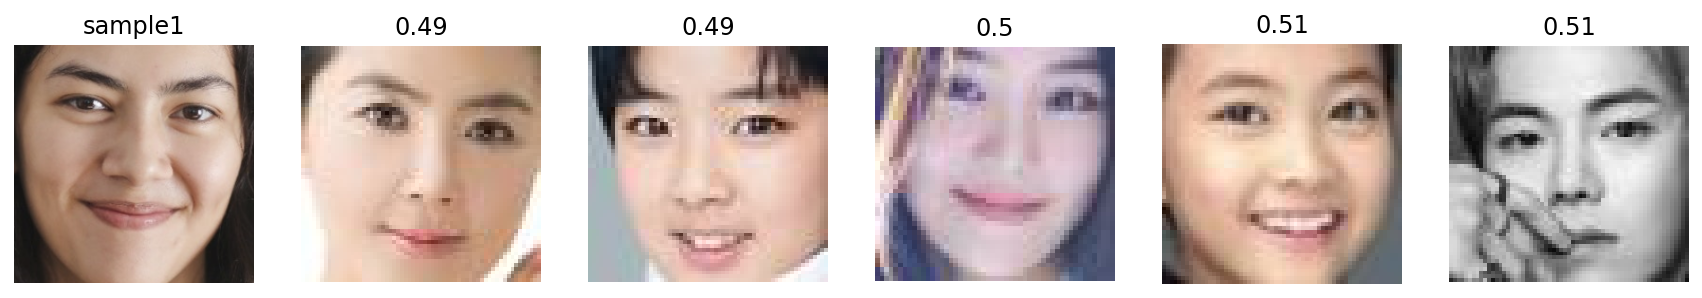

In [105]:
show_images_num(top5_dict_1,"sample1.png")

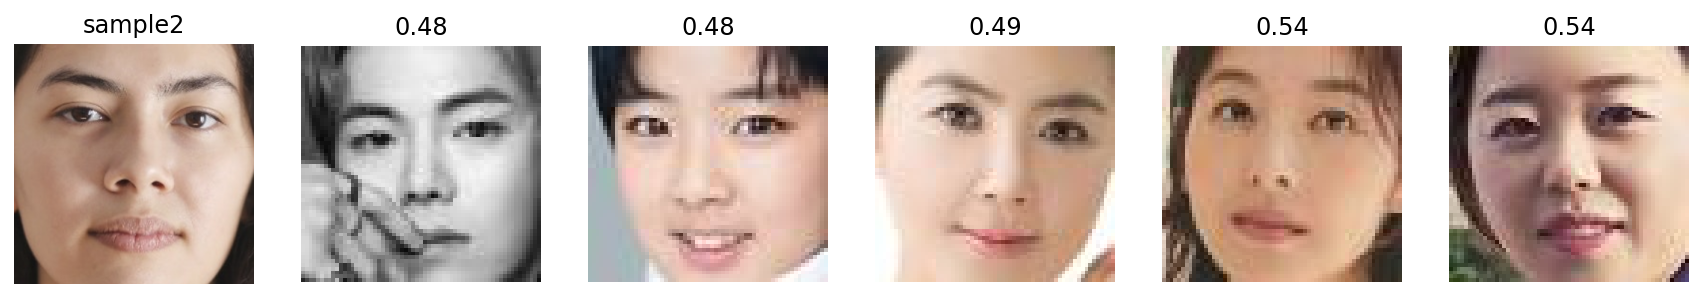

In [107]:
show_images_num(top5_dict_2,"sample2.png")

## 정리

- 얼굴을 인식하여 임베딩한뒤 임베딩된 벡터 간의 거리를 통해서 얼굴의 유사도를 측정할 수 있었다.

이때 동일 얼굴의 경우 약 **0.32**의 distance가 나왔다. 사진별로 상위 유사도에 속하는 distance가 각각 0.49 , 0.48가 나왔다. 하지만 생각보다 많이 닮지는 않았다.

- 마지막 Matplot lib를 활용해서 사진의 title을 한글로 지어주려고 했지만 한글 폰트가 깨지는 문제가 발생했다.

이를 해결하기 위해선 폰트를 다운 받은 다음 matplot lib의 옵션을 바꿔줘야 하는데 cloud 환경이라 옵션을 바꾸긴 힘들 거 같아서 한글 폰트 문제는 해결하지 못했다.